In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [10]:
file_path=r'C:\Users\Wsiwale\Desktop\Dataset\1000_Companies.csv'
profit_for_1000_company = pd.read_csv(file_path)
X = profit_for_1000_company.iloc[:, :-1].values
Y = profit_for_1000_company.iloc[:, 4].values

In [11]:
profit_for_1000_company.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
profit_for_1000_company.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


<Axes: >

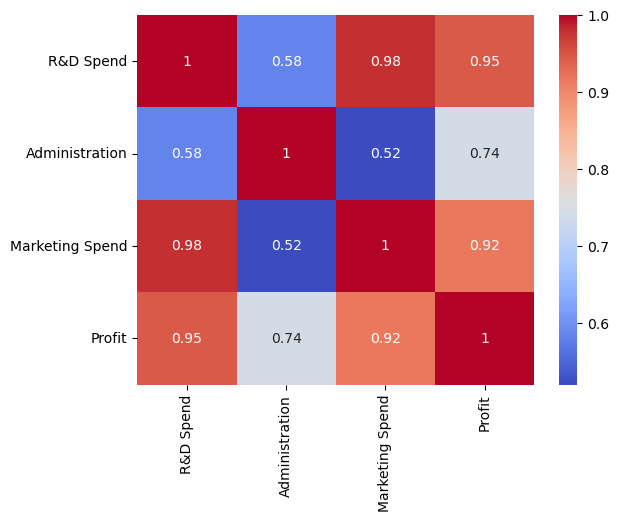

In [13]:
# Drop non-numeric columns
numeric_data = profit_for_1000_company.select_dtypes(include=[np.number])

# Calculate the correlation matrix on numeric data
corr_matrix = numeric_data.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [15]:

# Assuming X is your feature matrix and the third column needs to be encoded
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

# Use ColumnTransformer to apply OneHotEncoder to the desired column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')

# Apply the transformation
X = ct.fit_transform(X)

# Avoiding the dummy variable trap (optional step)
# This step might be needed if you are feeding the data into a regression model
X = X[:, 1:]  # Remove the first column of one-hot encoded data if necessary

Splitting the data into training and testing  

In [17]:
#splitting the dataset into the training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

fitting Multiple linear regression model to training set

In [24]:
from sklearn.linear_model import LinearRegression

# Create the model with the correct parameters
model_fit = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)  # No need to specify 'normalize' as it's deprecated

# Fit the model to the training data
model_fit.fit(X_train, Y_train)

LinearRegression(n_jobs=1)

Predicting tthe test set results
Y_pred = regressor.predict(X_train):

regressor: This is your previously trained regression model, usually an instance of LinearRegression or any other regression model from scikit-learn.
.predict(): This method is used to make predictions on the input data. It takes a set of features (X_train in this case) and uses the fitted model to predict the target variable values.
X_train: The training dataset's feature set that you originally used to train the model. This means you are making predictions on the training data itself.
Y_pred: The variable that stores the predicted values of the target variable based on X_train. It will be a NumPy array of predicted values corresponding to each row in X_train.
Y_pred:

When you write just Y_pred on a separate line in a Jupyter Notebook or similar environment, it outputs the content of Y_pred, displaying the predicted values. This helps in quickly checking what predictions the model has made.

In [30]:
Y_pred = regressor.predict(X_train)
Y_pred

array([ 82571.30079558, 156539.7726054 , 136578.43226267,  60714.27481431,
       143248.88956995, 176993.89338458,  87292.12272048, 136629.06100153,
       169661.19633204,  95082.08314972, 137276.93716977, 126304.56713978,
        36637.07983628,  71054.43913613, 166842.73859607, 138963.02004892,
       127244.2021655 , 137786.54553916,  82772.6847354 , 130851.37831224,
       170004.44197086, 108883.54410401, 123724.62867064, 117496.02525361,
        60630.17961514, 126543.12287765, 179732.1356815 ,  53861.26360751,
       124464.89843728, 173211.21464325,  69990.82486339, 152171.97147594,
       134551.90244193,  60413.93485117,  85726.47515814,  84843.92303796,
        98519.68849142,  76252.48394856, 128405.75292603, 110403.71160456,
        59988.31025626, 101951.80931108, 147911.54606146, 159248.09237868,
       161438.33558699, 185489.55948603,  55764.15009667, 158060.45052045,
        67265.45430133, 164265.48593022,  64137.18081415,  59029.68526485,
       140547.5461501 ,  

In [31]:
#Calculating the coefficients
print(regressor.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [32]:
##Calculating the Intercept
print(regressor.intercept_)

-51035.2297240395


In [35]:
from sklearn.metrics import r2_score

# Ensure predictions are made on the correct test set
Y_pred = regressor.predict(X_test)

# Check the consistency of lengths
print(f"Length of Y_test: {len(Y_test)}")
print(f"Length of Y_pred: {len(Y_pred)}")

# Calculate R-squared score if lengths are consistent
if len(Y_test) == len(Y_pred):
    r2 = r2_score(Y_test, Y_pred)
    print(f"R-squared: {r2:.2f}")
else:
    print("Lengths of Y_test and Y_pred do not match.")

Length of Y_test: 200
Length of Y_pred: 200
R-squared: 0.91
